In [104]:
import matplotlib.pyplot as plt
import numpy as np

def plot_mixer_quant(run_collector, title, key="ReturnAverage", max_n=None, labels=None, xmax=None, colors=None, 
                     lines=None):
    """
    Plot quantiles over a number of runs
    """
    train = run_collector[key]

    for i, key in enumerate(train.keys()):
        runs = train[key]
        train_quantiles = get_quant_stats(runs, max_n=max_n, xmax=xmax)

        train_x = range(len(train_quantiles[1]))

        train_q1 = np.array(train_quantiles[0])
        train_qmean = np.array(train_quantiles[1])
        train_q2 = np.array(train_quantiles[2])
        

        qmean = train_qmean
        q1_offset = qmean - train_q1
        q2_offset = train_q2 - qmean

        plt.fill_between(train_x, qmean-q1_offset, qmean+q2_offset, alpha=0.2, color=colors[i])
        plt.plot(train_x, qmean, color=colors[i], label=labels[i], linestyle=lines[i])
        
    plt.yscale('symlog') 
    plt.ylabel("Average Return")
    plt.xlabel("Time steps (x 10000) ")
    plt.legend(loc='lower right')
    plt.grid(True, linewidth=0.25)
    plt.title(title)
    plt.show()

In [105]:
from scipy.stats import mstats

def get_quant_stats(runs, max_n=None, xmax=None):
    """
    Get 25%, 50% and 75% quantiles
    """
    runs = [x[:xmax] for x in runs if len(x) >= xmax ]
    runs = np.concatenate([np.expand_dims(np.array(x),0) for x in runs], axis=0)  # If there's an error here, it means that the runs array is empty for some reason
    if max_n is not None:
        runs = runs[:max_n]
    quantiles = mstats.mquantiles(runs, axis=0)
    return quantiles

3
15
15


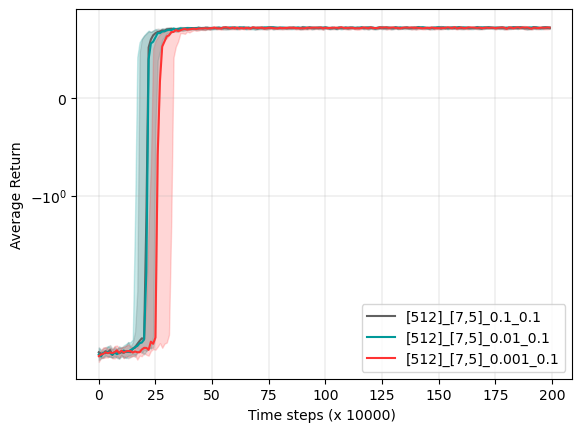

In [107]:
from helpers import Folder, get_run_collector

# Name of folder that logs are stored in and the label
folders = []
labels = []
for string in ["[512]_[7,5]_0.1_0.1", "[512]_[7,5]_0.01_0.1", "[512]_[7,5]_0.001_0.1"]:
    folders.append(f"GridworldExperiment_equivariant_{string}")
    labels.append(f"{string}")
# Plot colors
colors = ["#616161", "#009999", "#FF3333", "#354D73", "#734222", "#B32821", "#3E5F8A", "#999950", "#E63244", "#C7B446", "#3B3C36", "#1D1E33", "#F44611", "#3d3d3d", "#8673A1"]
# Plot linestyles
lines = ["solid", "solid", "solid", "solid", "solid", "solid", "solid", "solid", "solid", "solid", "solid", "solid", "solid", "solid", "solid"]

print(len(folders))
print(len(colors))
print(len(lines))

# Every run is stored in a top level folder named for the date it was started on. Replace this list with the 
# correct date/folder names
top_folders = ["20240220_1", "20240221_1"]

# Can also replace this with one of the other values logged during training, e.g. ReturnMax or ReturnMedian
values = ["ReturnAverage"]
# If this list is empty, all runs regardless of setting are aggregated. 
# If you are tuning learning rates, split on "lr" as well
split_on = ["const", "fcs", "channels"]

# Collects the relevant logs
run_collector = get_run_collector(split_on, top_folders, folders, values)

# Plot wrapper
plot_mixer_quant(run_collector, title="", key="ReturnAverage", labels=labels, xmax=200, colors=colors, lines=lines)